In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 데이터 출처 : 한국은행 경제통계시스템 
# https://ecos.bok.or.kr/#/SearchStat

In [5]:
df = pd.read_excel('data/Currency.xlsx', index_col=0)

In [6]:
df.tail()

,"M2(평잔, 원계열)","M2 (말잔,원계열)","M1 (평잔, 원계열)","M1 (말잔, 원계열)"
항목명1,,,,
2022/03,3672133.4,3652818.7,1370237.5,1381077.5
2022/04,3675828.7,3673715.3,1377050.8,1380658.0
2022/05,3694489.3,3699349.5,1374671.3,1386374.8
2022/06,3714135.0,3702913.2,1386071.5,1401276.6
2022/07,3720324.1,3718139.9,1366219.8,1344145.6


In [7]:
# 평잔 데이터를 볼 예정
df_2 = df[['M1 (평잔, 원계열)', 'M2(평잔, 원계열)']]
df_2.columns = ['M1', 'M2']

In [8]:
df_2.head()

,M1,M2
항목명1,,
2001/01,200074.9,711867.7
2001/02,201160.7,716583.9
2001/03,206680.3,717847.3
2001/04,204714.3,718780.3
2001/05,204840.0,723359.5


In [9]:
#index 를 datetime 형식으로 변경 (추후에 편한 정렬 및 loc 를 위해)
df_2.index = pd.to_datetime(df_2.index)
df_2 = df_2.sort_index()

In [10]:
df_2.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01'],
              dtype='datetime64[ns]', name='항목명1', length=259, freq=None)

In [11]:
df_2.head()

,M1,M2
항목명1,,
2001-01-01,200074.9,711867.7
2001-02-01,201160.7,716583.9
2001-03-01,206680.3,717847.3
2001-04-01,204714.3,718780.3
2001-05-01,204840.0,723359.5


In [12]:
# 연도, 월, 일, 분기를 따로 저장
df_2['일자'] = df_2.index

In [13]:
df_2['연'] = df_2['일자'].dt.year
df_2['월'] = df_2['일자'].dt.month
df_2['분기'] = df_2['일자'].dt.quarter

In [14]:
df_2.head()

,M1,M2,일자,연,월,분기
항목명1,,,,,,
2001-01-01,200074.9,711867.7,2001-01-01,2001,1,1
2001-02-01,201160.7,716583.9,2001-02-01,2001,2,1
2001-03-01,206680.3,717847.3,2001-03-01,2001,3,1
2001-04-01,204714.3,718780.3,2001-04-01,2001,4,2
2001-05-01,204840.0,723359.5,2001-05-01,2001,5,2


In [15]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2001-01-01 to 2022-07-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   M1      259 non-null    float64       
 1   M2      259 non-null    float64       
 2   일자      259 non-null    datetime64[ns]
 3   연       259 non-null    int64         
 4   월       259 non-null    int64         
 5   분기      259 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 14.2 KB


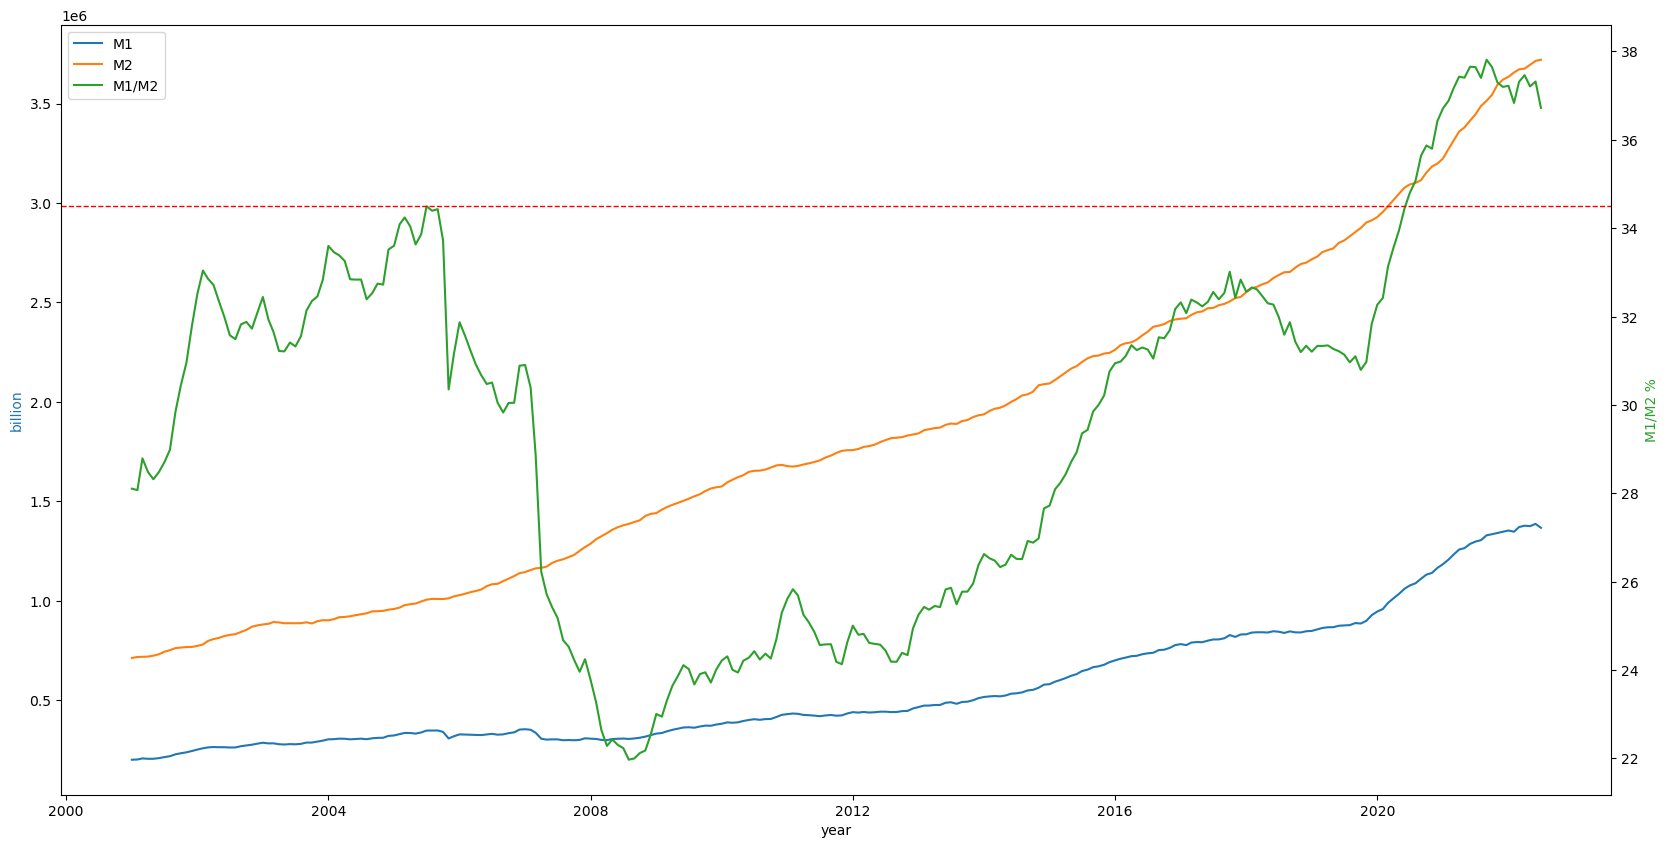

In [16]:
fig = plt.figure(figsize=(20, 10))

from mpl_toolkits.axes_grid1 import host_subplot

host = host_subplot(111)
par = host.twinx()

host.set_xlabel("year")
host.set_ylabel("billion")
par.set_ylabel("M1/M2 %")

p1, = host.plot(df_2.index, df_2['M1'], label="M1")
host.plot(df_2.index, df_2['M2'], label="M2")
p2, = par.plot(df_2.index,df_2['M1']/df_2['M2']*100, label="M1/M2")
par.axhline(y=34.4948, linestyle='--', color='r', linewidth=1)

host.legend()

host.yaxis.get_label().set_color(p1.get_color())
par.yaxis.get_label().set_color(p2.get_color())

#par.axhline(0, 1, 34.49483870107493, color='lightgray', linestyle='--', linewidth=2)

plt.show()

In [17]:
df_2['M1/M2 %'] = df_2['M1']/df_2['M2']*100

In [18]:
df_2[ df_2['연']<2008 ]['M1/M2 %'].max()

34.49483870107493

In [19]:
df_2[ df_2['M1/M2 %'] >=34.49 ]

,M1,M2,일자,연,월,분기,M1/M2 %
항목명1,,,,,,,
2005-07-01,346659.4,1004960.2,2005-07-01,2005,7,3,34.494839
2020-07-01,1076665.6,3093300.1,2020-07-01,2020,7,3,34.806374
2020-08-01,1087250.7,3100373.4,2020-08-01,2020,8,3,35.068379
2020-09-01,1110397.1,3115238.9,2020-09-01,2020,9,3,35.644043
2020-10-01,1130987.6,3152811.6,2020-10-01,2020,10,4,35.872350
2020-11-01,1139632.4,3183500.9,2020-11-01,2020,11,4,35.798086
2020-12-01,1164720.1,3197671.2,2020-12-01,2020,12,4,36.424011
2021-01-01,1183360.4,3223486.7,2021-01-01,2021,1,1,36.710572
2021-02-01,1206555.6,3271405.8,2021-02-01,2021,2,1,36.881869


In [20]:
#resample, 
#26.50